<a href="https://colab.research.google.com/github/kimjunwooo/python/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
# csv파일 불러오기

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
y=df['Outcome']
X=df.drop(columns=['Outcome'])

In [7]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
scaler= StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(df.drop(["Outcome"],axis = 1)),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [9]:
model = LogisticRegression(solver='newton-cg')
model.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [10]:
Y_pred = model.predict(X_test)
print('The accuracy of the Logistic Regression is',accuracy_score(Y_pred,y_test))

The accuracy of the Logistic Regression is 0.796875


In [11]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



In [12]:
confusion_matrix(y_test,Y_pred)
pd.crosstab(y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,117,13,130
1,26,36,62
All,143,49,192


In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)
y_scores = cross_val_predict(sgd_clf,X_train,y_train, cv = 3,method = "decision_function")

In [20]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train, y_scores)

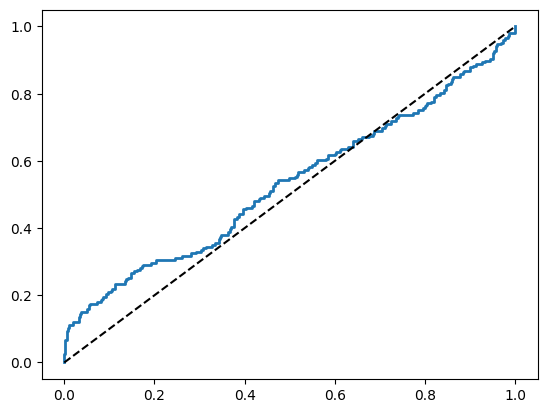

In [22]:
def plot_roc_curve(fpr, tpr, label = None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],'k--')
  [...]
plot_roc_curve(fpr,tpr)
plt.show()